# Graphiques de corrélation

In [8]:
# Classical imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
# Getting the dataset
df = pd.read_csv(r"DS_CentraleSupelec_ST42021/DS_CentraleSupelec_train.csv")

In [14]:
df.nunique()

userId               12000
age                     74
gender                   2
registrationDate      9875
languageCode             2
countryCode              1
emailContactable         2
postalContactable        2
postalCode            3794
numberChildren          10
lastActivityDate     12000
reactivationValue        5
toothBrushType           2
detergentType           10
MrPropreTrier            1
AntikalTrier             1
ArielTrier               1
DashTrier                1
scentLover               4
petOwner                 9
ecoInterest              4
closestShop              6
washDishes               2
dtype: int64

## Cleaning the dataset

Here our main interest is to get an understanding as to how the given attributes relate too the 'Automatic dishwasher' status.

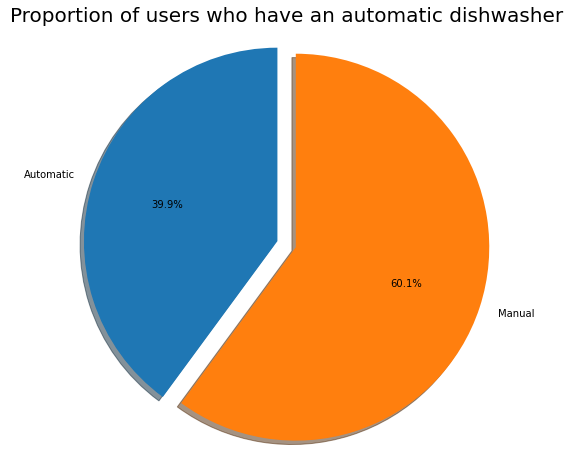

In [10]:
labels = 'Automatic', 'Manual'
sizes = [df.washDishes[df['washDishes']=='Auto'].count(), df.washDishes[df['washDishes']=='Hand'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of users who have an automatic dishwasher", size = 20)
plt.show()

So about 40% of the customers have an automatic dishwasher. The baseline model will be to predict that 40% of the customers might be interested by the Fairy product.

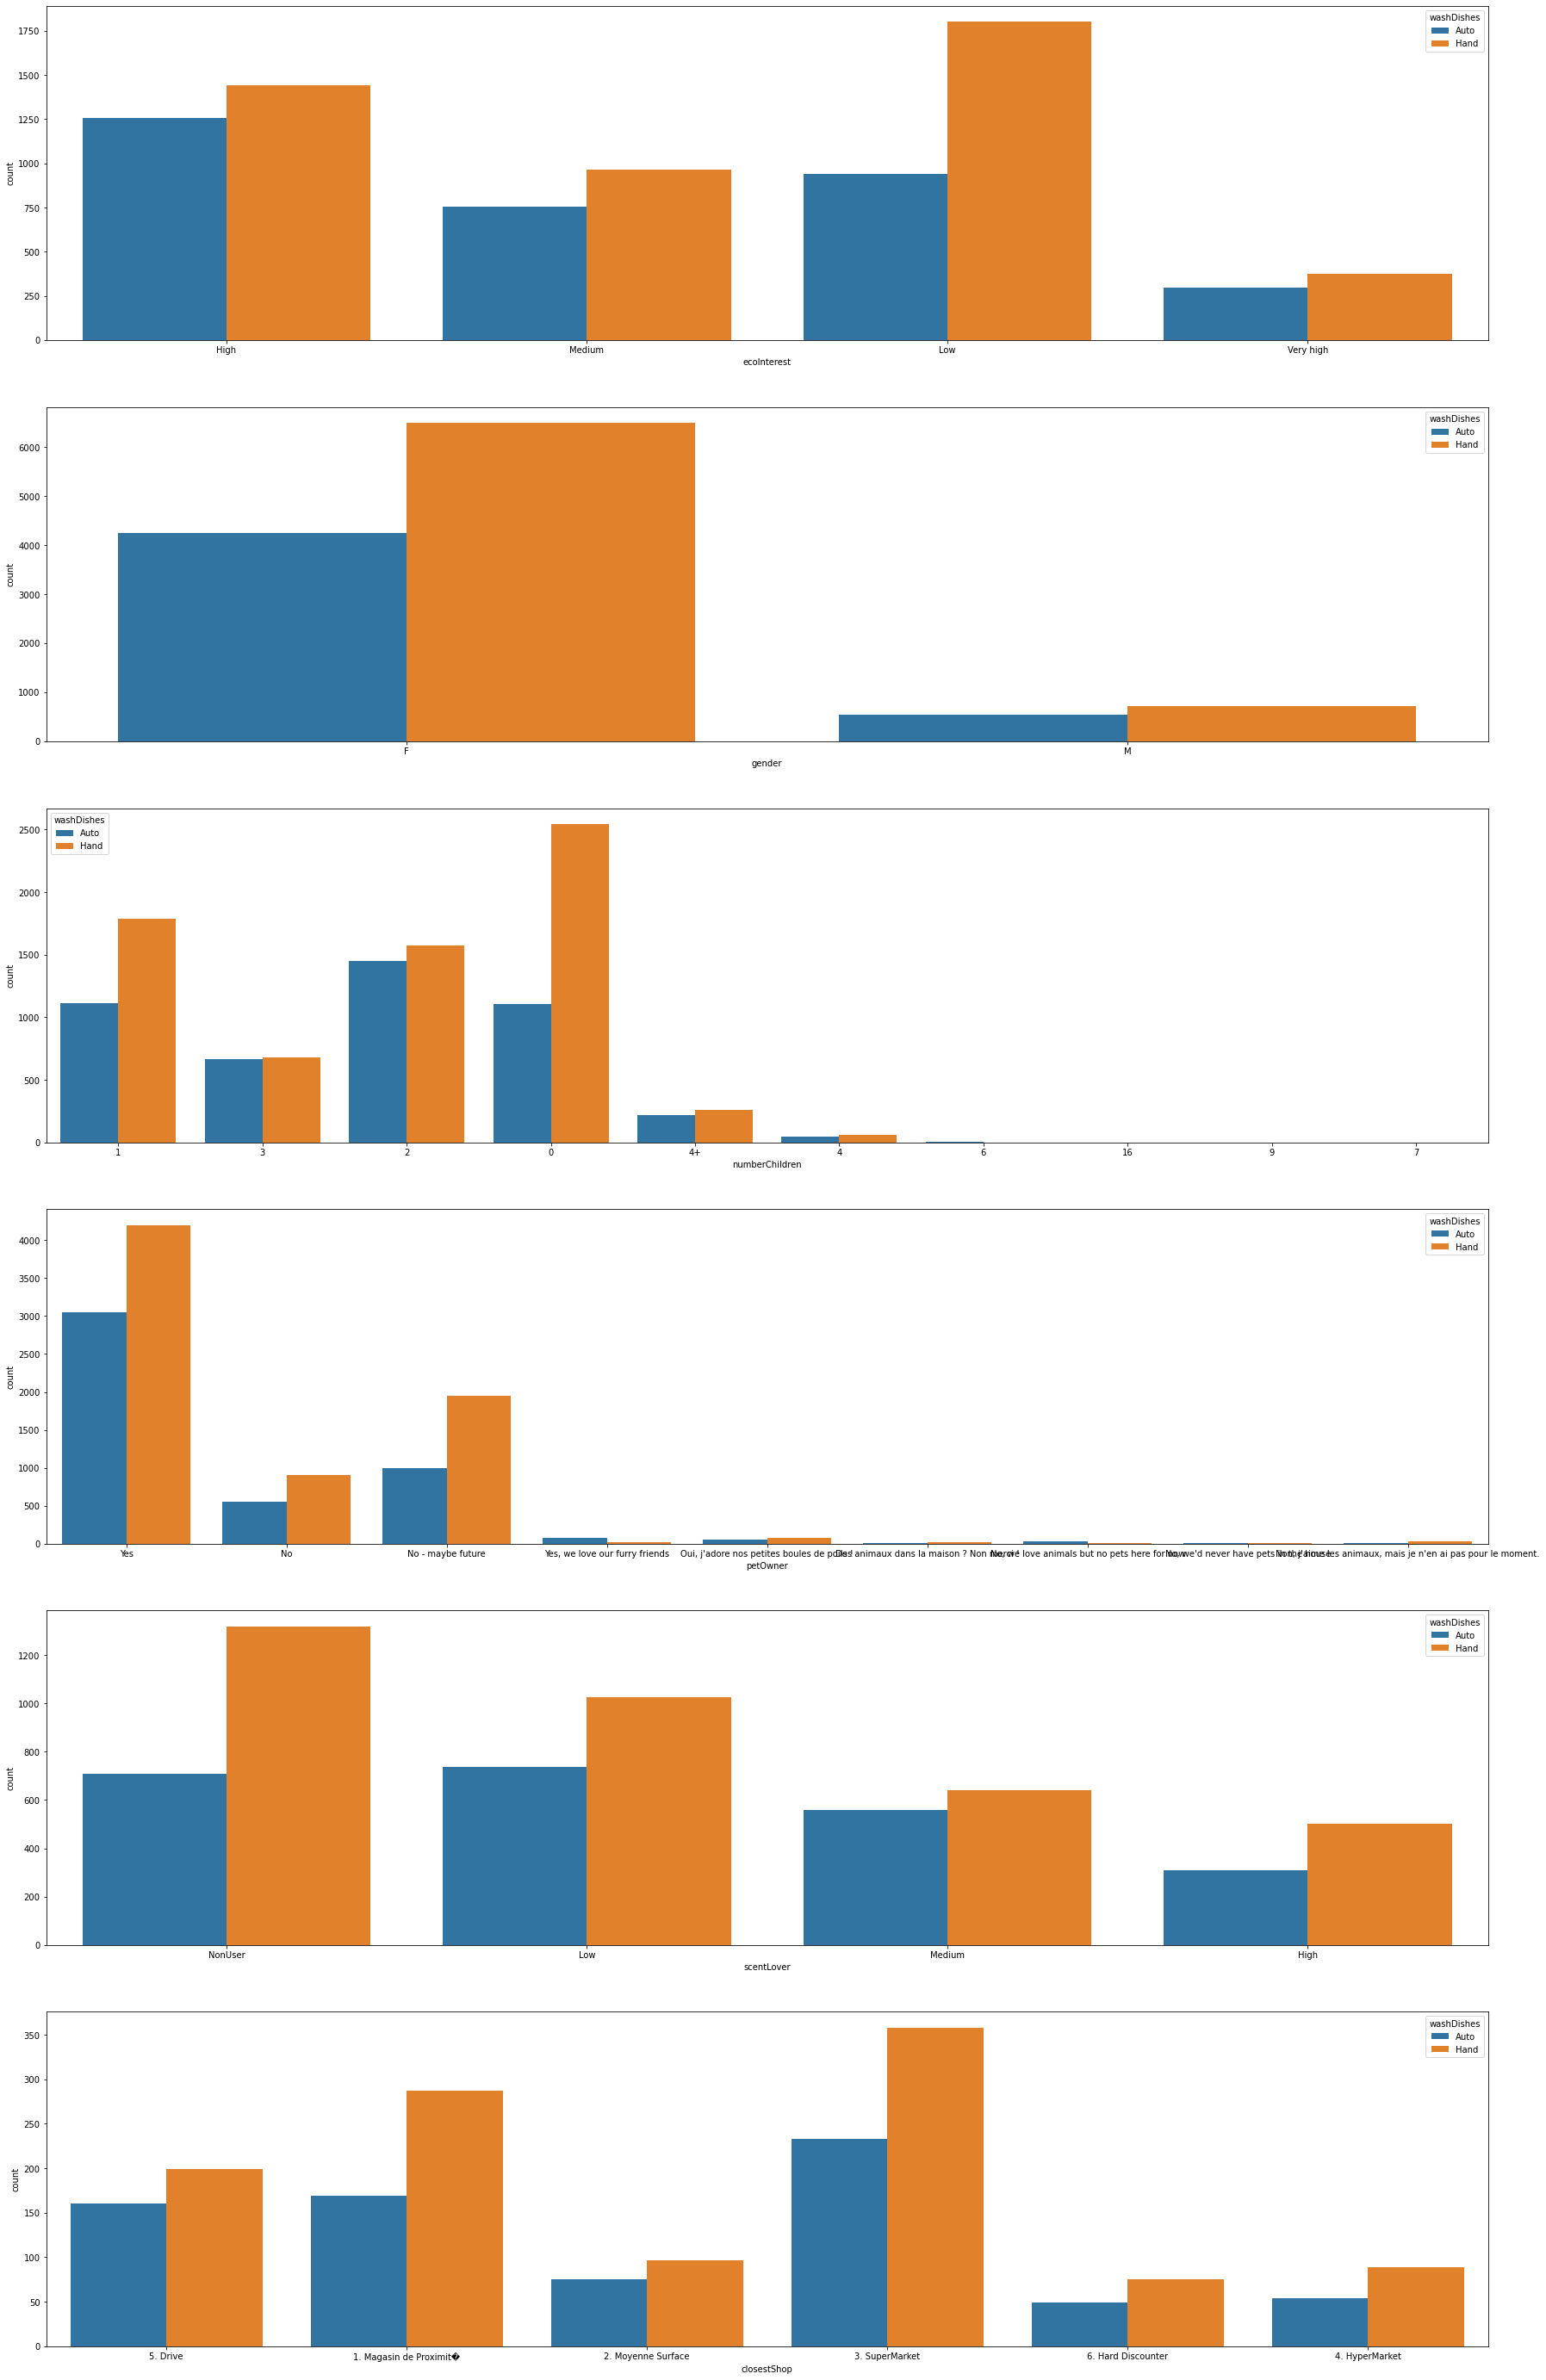

In [24]:
# We first review the relation of automatic dishwasher owners with categorical variables
fig, axarr = plt.subplots(6, 1, figsize=(30, 50))
sns.countplot(x='ecoInterest', hue = 'washDishes',data = df, ax=axarr[0])
sns.countplot(x='gender', hue = 'washDishes',data = df, ax=axarr[1])
sns.countplot(x='numberChildren', hue = 'washDishes',data = df, ax=axarr[2])
sns.countplot(x='petOwner', hue = 'washDishes',data = df, ax=axarr[3])
sns.countplot(x='scentLover', hue = 'washDishes',data = df, ax=axarr[4])
sns.countplot(x='closestShop', hue = 'washDishes',data = df, ax=axarr[5])

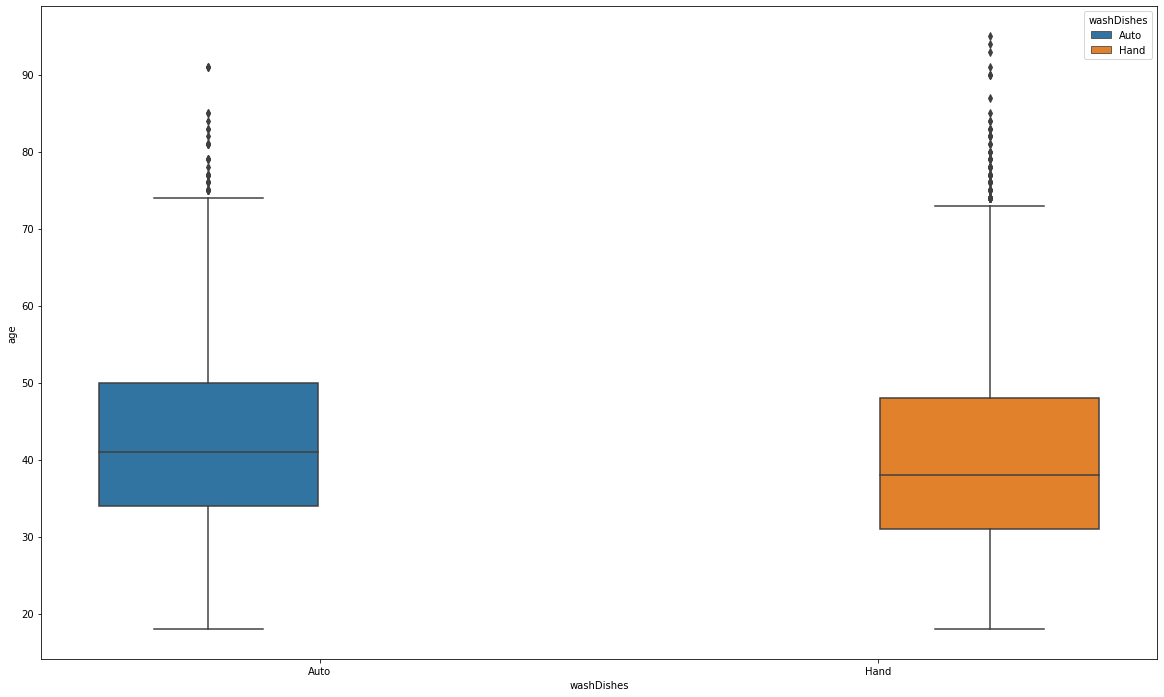

In [28]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(1, 1, figsize=(20, 12))
sns.boxplot(y='age',x = 'washDishes', hue = 'washDishes',data = df, ax=axarr)